In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif

In [2]:
df = pd.read_csv('application_train.csv')

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
list(np.sort([c for c in df.columns]))

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER',
 'COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'EMERGENCYSTATE_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT

## Missing Data

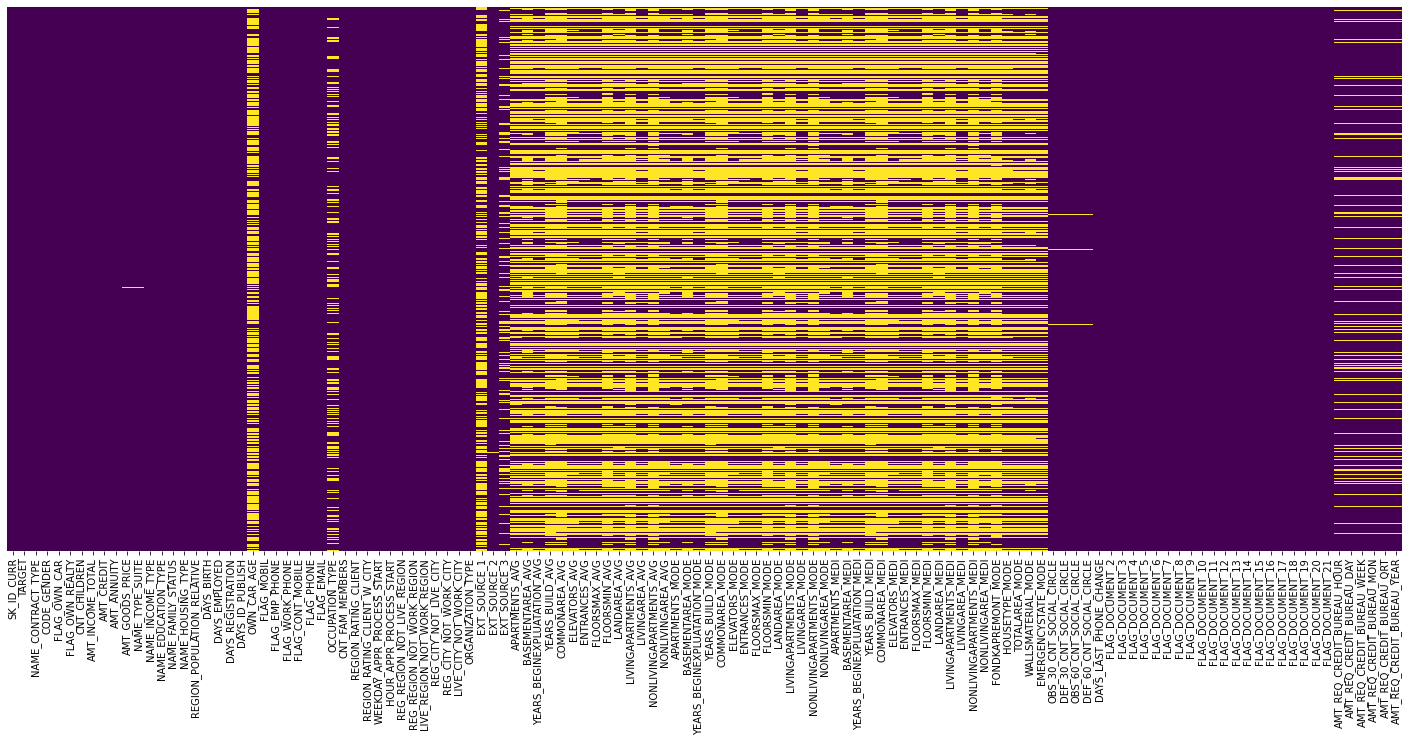

In [5]:
fig, ax = plt.subplots(figsize=(25, 10))
ax = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

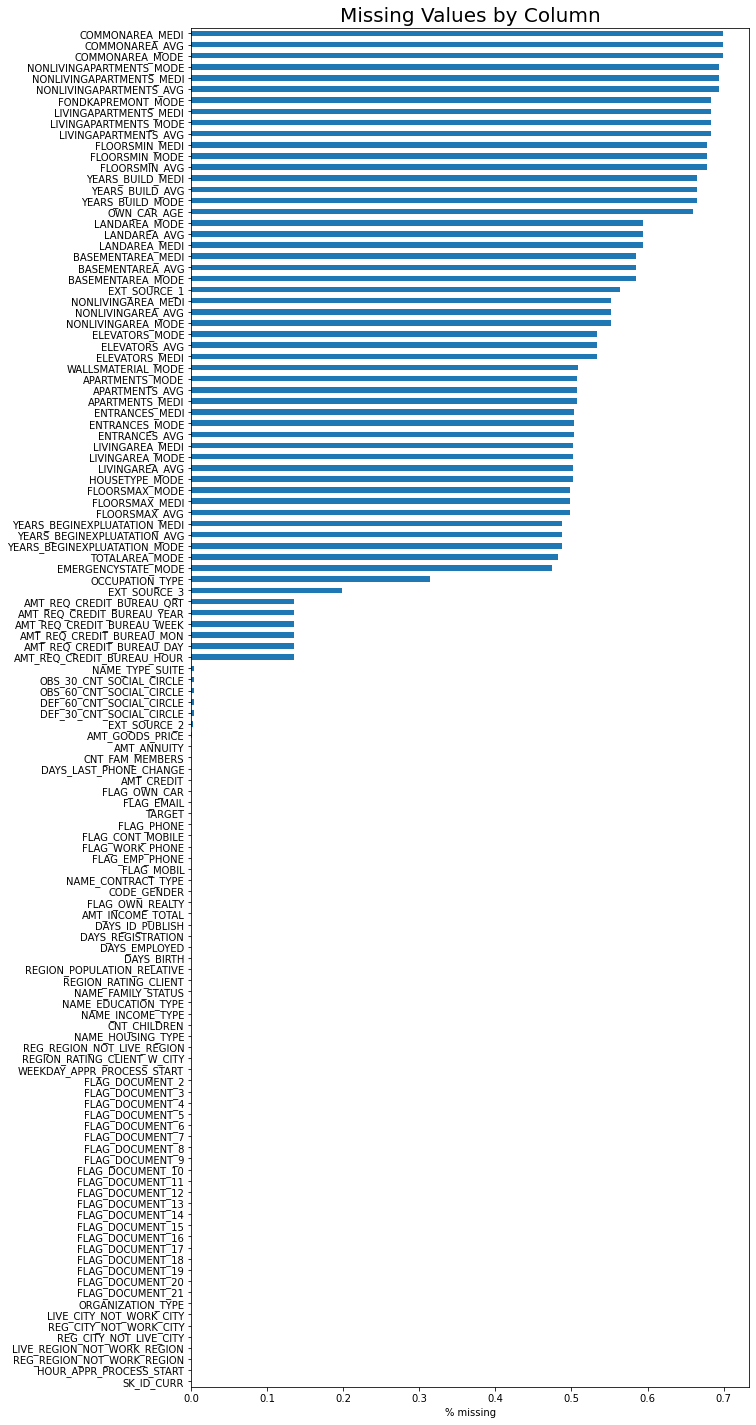

In [6]:
fig, ax = plt.subplots(figsize=(10, 25))
ax = (df.isna().sum() / len(df)).sort_values().plot.barh()
ax.set_xlabel('% missing')
ax.set_title('Missing Values by Column', fontsize=20)
plt.show()

## Dummify Categorical Variables

In [7]:
cat_cols = list(df.columns[df.dtypes == 'O'])
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [8]:
dummies = pd.get_dummies(df[cat_cols], prefix=cat_cols, drop_first=True)

In [9]:
df = pd.concat([df, dummies], axis=1).drop(columns=cat_cols)

## Correlations

In [10]:
corr_matrix = df.corr()

In [11]:
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

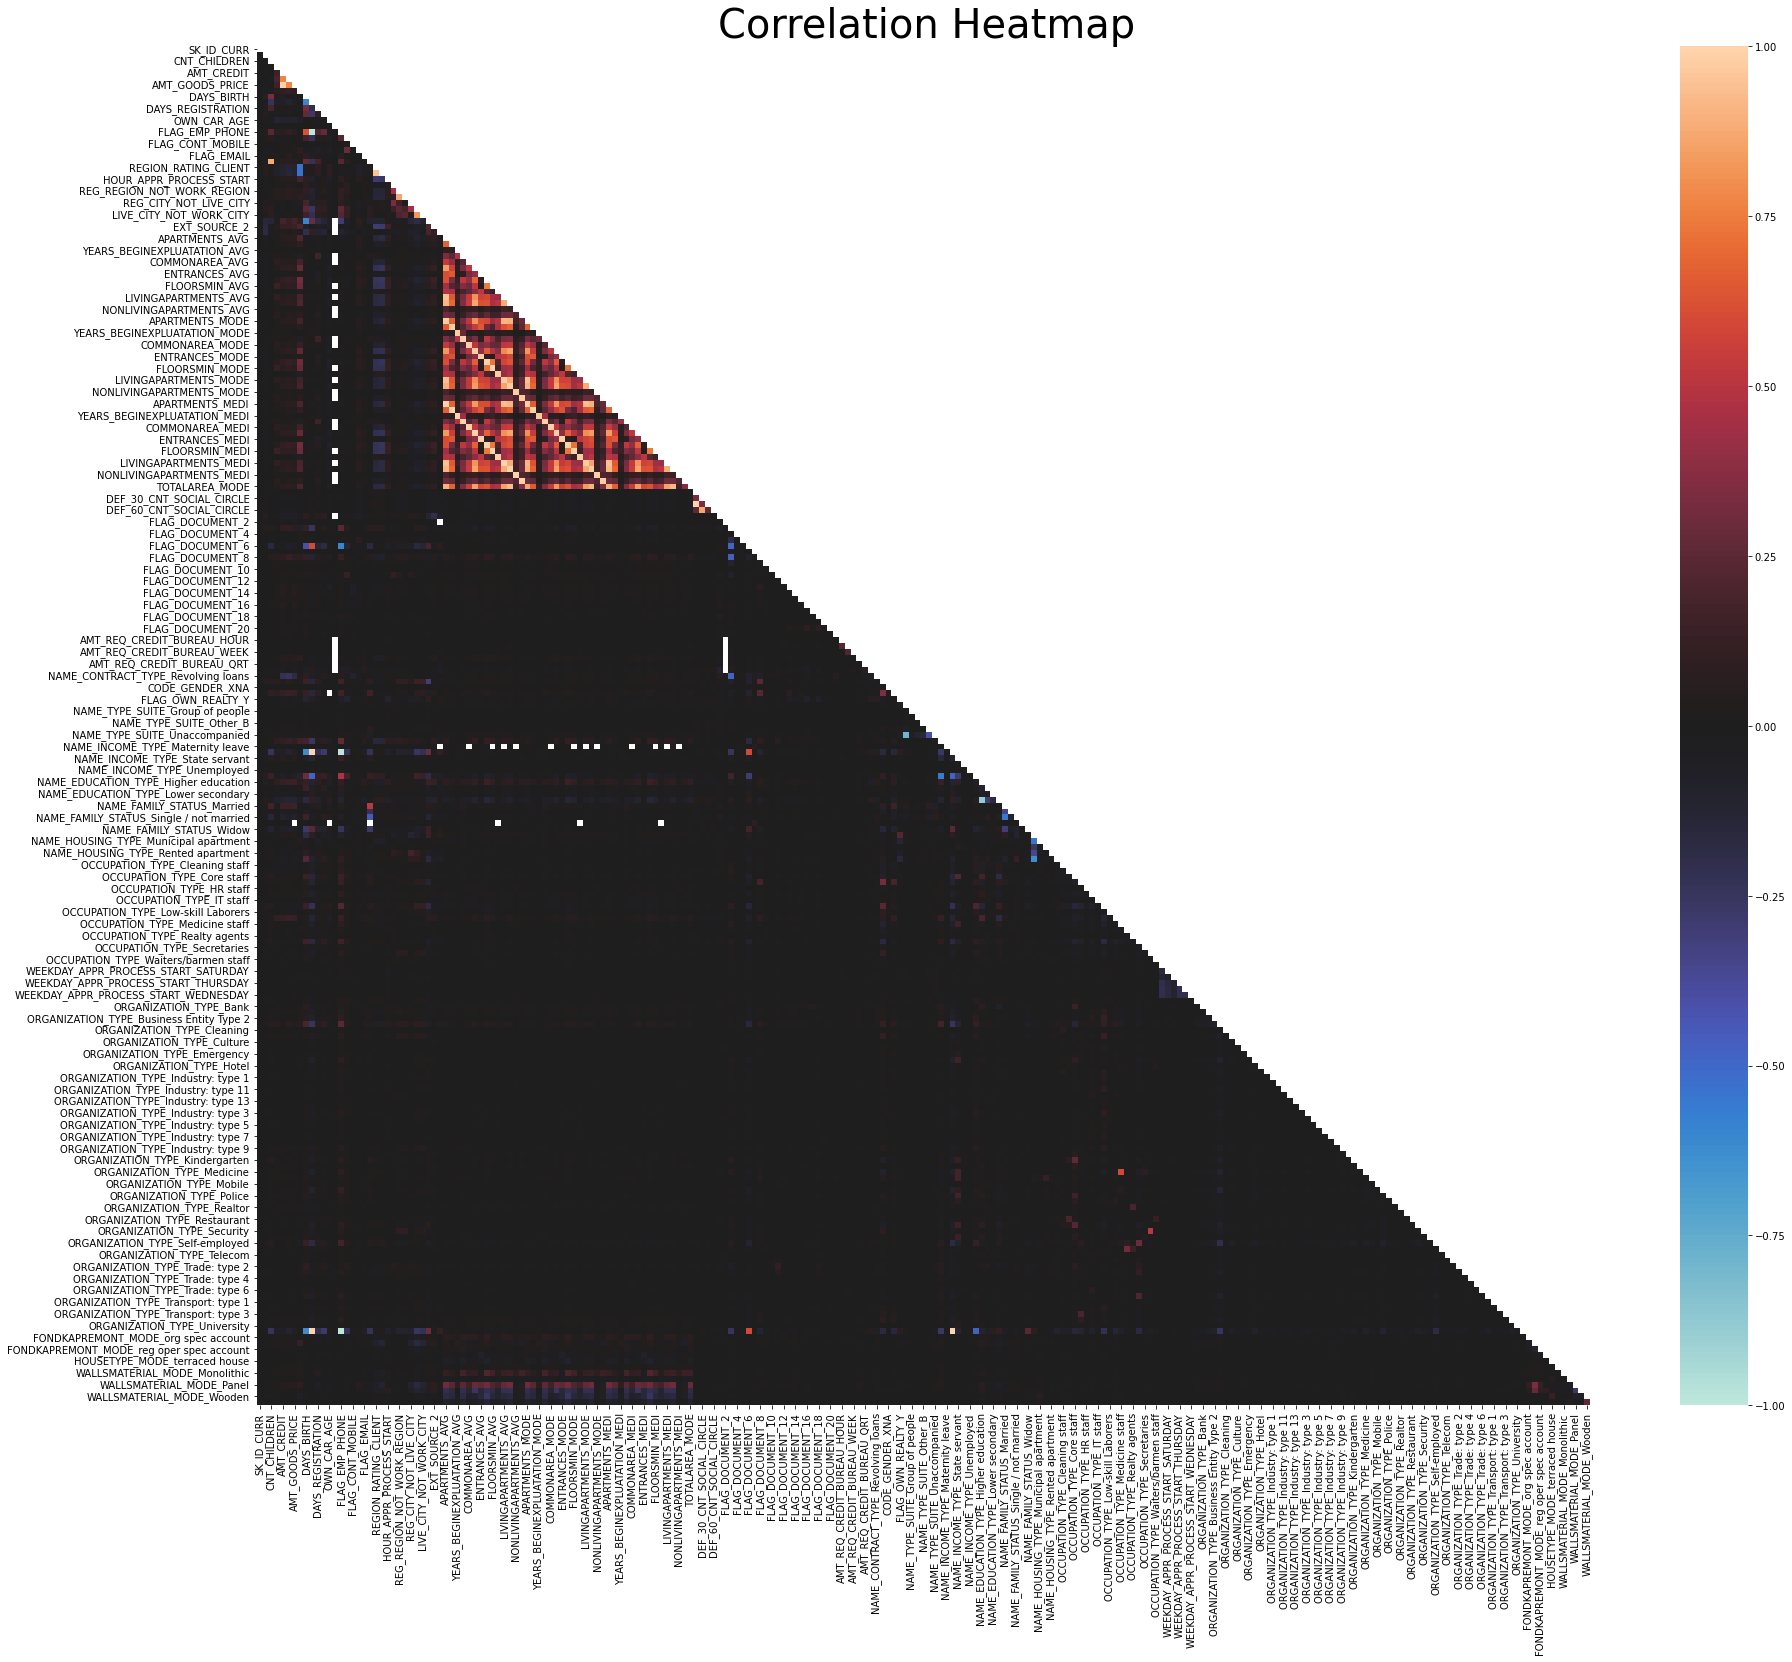

In [12]:
fig, ax = plt.subplots(figsize=(30, 25))
ax = sns.heatmap(corr_matrix,
            mask=mask,
            vmin=-1,
            vmax=1,
            center=0
)
ax.set_title('Correlation Heatmap', fontsize=40)
plt.show()

In [13]:
corr_matrix['TARGET'].sort_values(ascending=False)

TARGET                                  1.000000
DAYS_BIRTH                              0.078239
REGION_RATING_CLIENT_W_CITY             0.060893
REGION_RATING_CLIENT                    0.058899
NAME_INCOME_TYPE_Working                0.057481
                                          ...   
NAME_INCOME_TYPE_Pensioner             -0.046209
NAME_EDUCATION_TYPE_Higher education   -0.056593
EXT_SOURCE_1                           -0.155317
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_3                           -0.178919
Name: TARGET, Length: 230, dtype: float64

## Mutual Information

In [14]:
nonulls_df = df.dropna(axis=0)
y = nonulls_df['TARGET']
X = nonulls_df.drop(columns=['TARGET'])

In [15]:
mutual_info = mutual_info_classif(X, y, random_state=1)

In [16]:
mutual_info_df = pd.DataFrame({
    'feature': X.columns,
    'mutual_info': mutual_info
}).sort_values('mutual_info', ascending=False)

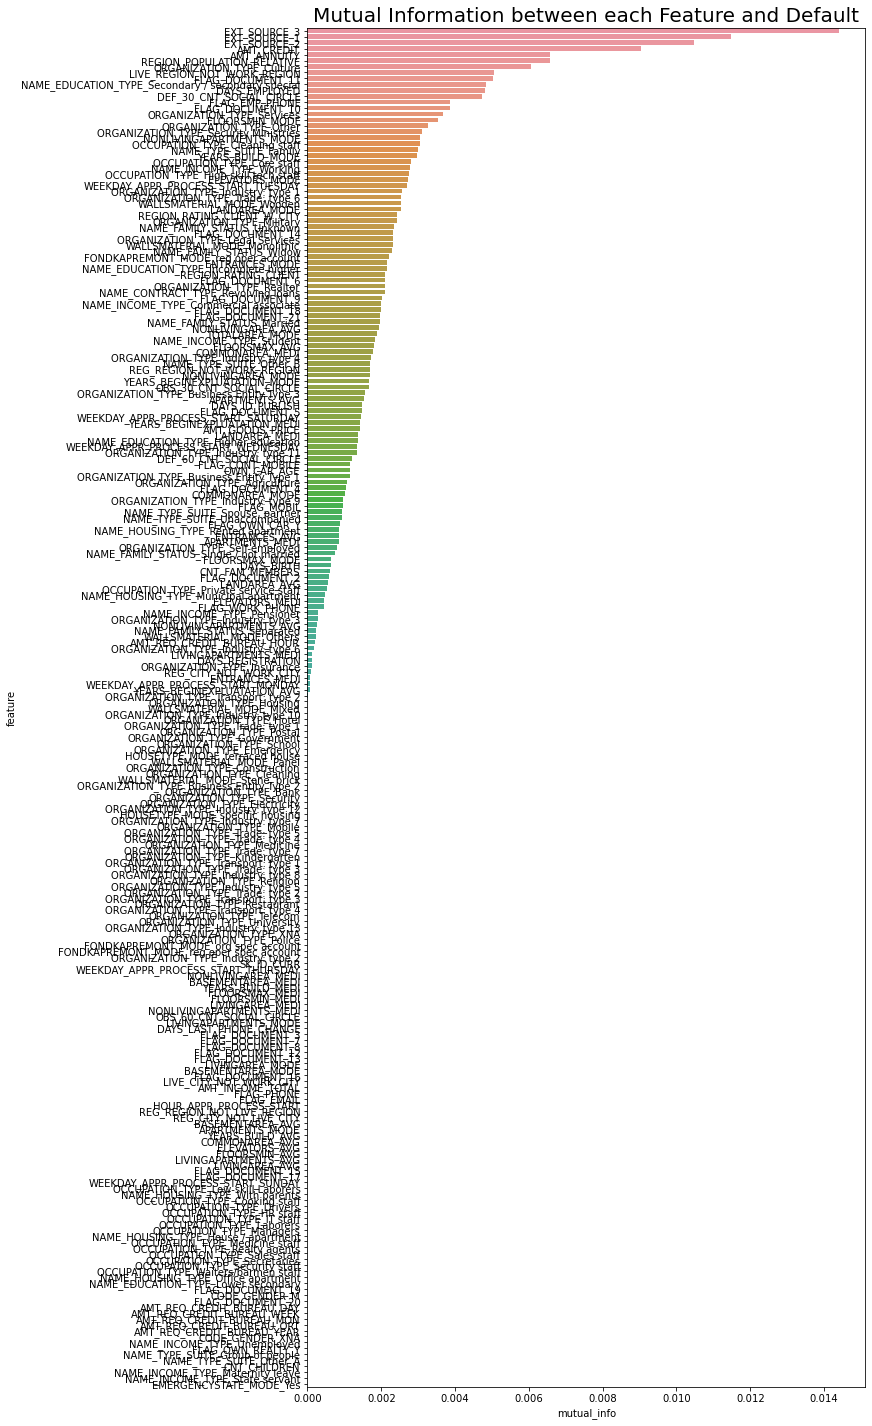

In [17]:
fig, ax = plt.subplots(figsize=(10, 25))
ax = sns.barplot(
    data=mutual_info_df,
    y='feature',
    x='mutual_info',
    orient='h'
)
ax.set_title('Mutual Information between each Feature and Default', fontsize=20)
plt.show()